# Evaluation Metrics for Classification

## Confusion Matrix

Confusion Matrix is a table where we can clearly see the predicted categories and actual categories. The confusion matrix for a binary classification looks like this:

<p align="center">
<img src="pic/confusion-matrix-ml-model-1.webp">
</p>

- True positives (TP): Predicted positive and are actually positive.

- False positives (FP): Predicted positive and are actually negative.

- True negatives (TN): Predicted negative and are actually negative.

- False negatives (FN): Predicted negative and are actually positive.

For example, here is a sample confusion matrix for a binary classification problem:

|  | Tumor(predicted) | Non-Tumor(predicted|
| --- | ---| --- | 
| Tumor (actual) |	18 |	1 |
|Non-Tumor (actual)	| 6	| 452 |

The preceding confusion matrix shows that of the 19 samples that actually had tumors, the model correctly classified 18 as having tumors (18 <b>true positives</b>), and incorrectly classified 1 as not having a tumor (1 <b>false negative</b>). Similarly, of 458 samples that actually did not have tumors, 452 were correctly classified (452 <b>true negatives</b>) and 6 were incorrectly classified (6 <b>false positives</b>).

Confusion matrices contain sufficient information to calculate a variety of performance metrics, including <b>precision</b> and <b>recall</b>.

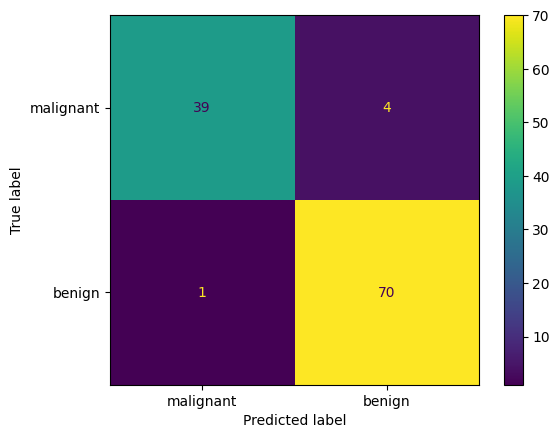

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
X,y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels = ['malignant', 'benign'])

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[39  4]
 [ 1 70]]

Accuracy:  0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Confusion Matrix for Multi-class Classification

The confusion matrix becomes larger as we move form a binary classification problem to a multi-class classification problem. This is how a confusion matrix for a multi-class problem would look like:

<img src="pic/1_SZWPw-EXH1DjCyr3caf0rA.webp">

The size of the confusion matrix is same as the number of target categories. 

## Accuracy

Accuracy is a measure of how often the classifier makes a correct prediction. It is the ratio of total correct predictions to the total predictions.

$$ Accuracy = \dfrac{TP + TN}{TP + TN + FP + FN}$$

Accuracy is a easy to understand metric and can be very useful when the dataset is balanced. However, it can be misleading when evaluating imbalanced datasets. When target classes in dataset have a large differences in terms of samples, it is an imbalanced dataset. Accuracy is not the best metric to use when dealing with imbalanced datasets. Let’s have a look at the example below.

<img src="pic/1__S3sHYtlmtzMHrleZYHuHg.webp">

In [3]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
#calling the accuracy_score function from metrics
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy score is: {:.2f}".format(accuracy_score))

correct_predictions = [pred for i,pred in enumerate(y_pred) if pred == y_test[i]]
accuracy_manual = len(correct_predictions)/len(y_pred)
print("Accuracy score is: {:.2f}".format(accuracy_manual))

Accuracy score is: 0.96
Accuracy score is: 0.96


## Precision

Precision is the measure of the ratio of true positive predictions to the total positive predictions of the model. Precision is a useful metric in cases where false positives are more significant than false negatives. 

<p align="center">
<img src="pic/precision-ml-model-1.webp">
</p>

<p align="center">
<img src="pic/1_s9-3x8HWLWqwjMJoQHIPnQ.webp">
</p>

In [9]:
from sklearn.metrics import precision_score

precision_score = precision_score(y_test, y_pred)
print("Precision score is: {:.2f}".format(precision_score))

TP = [pred for i,pred in enumerate(y_pred) if (pred == y_test[i] & pred == 1)]
TP_FP = [pred for i,pred in enumerate(y_pred) if (pred == 1)]
precision_manual = len(TP) / len(TP_FP)
print("Precision score is: {:.2f}".format(precision_manual))

Precision score is: 0.95
Precision score is: 0.95


## Recall

Recall is the ratio of how many of the positive cases the model was able to correctly predict. Recall is a useful metric when false negatives are more significant than false positives. Like we mentioned, it is, for example, important in medical cases (like we have with cancer dataset) where we do not want to miss any actual positives whereas false alarms (false positives) can be considered less important.

<p align="center">
<img src="pic/recall-ml-model-1.webp">
</p>

<p align="center">
<img src="pic/1_cqtTKuz4vmnyjMg6Gxw2Nw.webp">
</p>

In [12]:
from sklearn.metrics import recall_score

recall_score = recall_score(y_test, y_pred)
print("Recall score is: {:.2f}".format(recall_score))

TP = [pred for i,pred in enumerate(y_pred) if (pred == y_test[i] & pred == 1)]
TP_FN = [pred for i,pred in enumerate(y_pred) if (y_test[i] == 1)]
recall_manual = len(TP) / len(TP_FN)
print("Recall score is: {:.2f}".format(recall_manual))

Recall score is: 0.99
Recall score is: 0.99


## Sensitivity and Specificity (Medical Applications)

Specificity entails the percentage of negative instances out of the total actual negative instances. 

<img src="pic/NzSnD.jpeg">

## F1-Score

F1- score is a combination of both precision and recall. It is the harmonic mean of precision and recall and is maximum when precision is equal to recall. So when we are looking for the best of both worlds (when we have no difference of significance between false positives and false negatives) f1 is our metric.

<p align="center">
<img src="pic/f1-score-ml-model-1.webp" width="400px">
</p>

In [13]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred)
print("F1-score is: {:.2f}".format(f1_score))

f1_manual = 2*precision_manual*recall_manual/(precision_manual + recall_manual)
print("F1-score is: {:.2f}".format(f1_manual))

F1-score is: 0.97
F1-score is: 0.97


## Precision-Recall Curve (PR Curve)

PR curve is a graph illustrating the change of precision values with respect to the recall value for binary classification. PR curve is plotted by calculating the precision and recall values for different thresholds for a classifier and plotting the values. Ex. for logistic regression the threshold would be the predicted probability of a prediction belonging to the positive class.

It is often used in problems with imbalanced dataset.

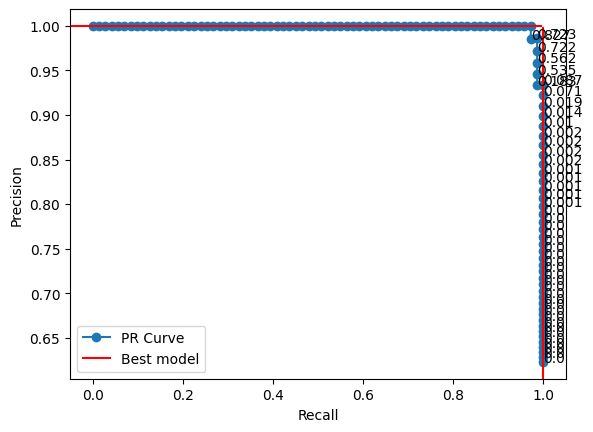

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probabilities = clf.predict_proba(X_test)[:,1]
precision_vals,recall_vals,thresholds = precision_recall_curve(y_test, probabilities)
plt.plot(recall_vals, precision_vals, label = 'PR Curve', marker='o')
for i,val in enumerate(precision_vals):
  if precision_vals[i] != precision_vals[-1]:
    plt.text(recall_vals[i], val, str(round(thresholds[i],3)), fontsize=10)
plt.axvline(x=1,ymin=0, ymax=0.95, color='r', label="Best Model")
plt.axhline(y=1, xmin=0, xmax=0.95, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['PR Curve', 'Best model'], loc = 'best')
plt.show()

In [16]:
f1_score = (2 * precision_vals * recall_vals) / (precision_vals + recall_vals)
f1_score

array([0.76756757, 0.77173913, 0.77595628, 0.78021978, 0.78453039,
       0.78888889, 0.79329609, 0.79775281, 0.80225989, 0.80681818,
       0.81142857, 0.81609195, 0.82080925, 0.8255814 , 0.83040936,
       0.83529412, 0.84023669, 0.8452381 , 0.8502994 , 0.85542169,
       0.86060606, 0.86585366, 0.87116564, 0.87654321, 0.88198758,
       0.8875    , 0.89308176, 0.89873418, 0.9044586 , 0.91025641,
       0.91612903, 0.92207792, 0.92810458, 0.93421053, 0.94039735,
       0.94666667, 0.95302013, 0.95945946, 0.96598639, 0.95890411,
       0.96551724, 0.97222222, 0.97902098, 0.98591549, 0.9787234 ,
       0.98571429, 0.97841727, 0.97101449, 0.96350365, 0.95588235,
       0.94814815, 0.94029851, 0.93233083, 0.92424242, 0.91603053,
       0.90769231, 0.89922481, 0.890625  , 0.88188976, 0.87301587,
       0.864     , 0.85483871, 0.84552846, 0.83606557, 0.82644628,
       0.81666667, 0.80672269, 0.79661017, 0.78632479, 0.77586207,
       0.76521739, 0.75438596, 0.74336283, 0.73214286, 0.72072

In [17]:
import numpy as np
ix = np.argmax(f1_score)
print('Best Threshold=%f, F1-Score=%.3f' % (thresholds[ix], f1_score[ix]))

Best Threshold=0.722883, F1-Score=0.986


## ROC Curve (Receiver Operating Characteristic Curve)

A ROC curve is a plot indicating the performance of a classification model for different classification thresholds by plotting True Positive Rate (Recall) against the False Positive Rate (FPR). It has a similar idea to PR Curve but we plot the FPR instead of precision in this curve.

$$ FPR = \dfrac{FP}{FP + TN}$$

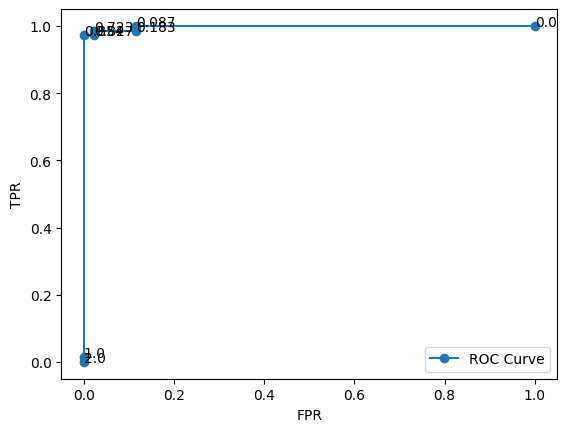

In [18]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot( fpr, tpr,  label = 'ROC Curve', marker='o')
for i,val in enumerate(tpr):
    plt.text(fpr[i], val, str(round(thresholds[i],3)), fontsize=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'best')
plt.show()

By lowering the classification threshold, more predictions are identified as positive. This increases both false positivi and true positive rates. Therefore, the curve looks different to that of a PR curve.

In ROC curve, we are looking for the ideal point which is closest to the top left corner. Having a number to estimate how close our curve is to the top left corner would be useful right? Area Under the Curve (AUC) is another method which can help us here.

## Area Under the Curve (AUC)

AUC / Area Under the Curve is the entire two dimensional area under the ROC curve. AUC helps us summarise the information from a ROC curve (can also be used for PR curve) into a single value.

ROC curve is basically a curve of probabilities (threholds) and AUC basically is the measure of separability of the calsses. It tells us how well the model is able to predict the classes. Therefore, a higher AUC value means a better classifier. AUC value varies between 0 and 1, meaning a value of 1 would mean a perfect classifier.

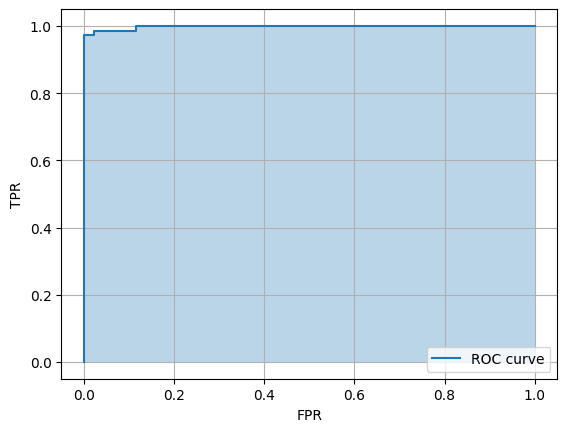

In [19]:
plt.plot( fpr, tpr,  label = 'ROC curve')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'best')
plt.grid()
plt.show()

A classifier model which can not discriminate between the two classes (a no-skill classifier) would predict the most frequent occuring class or a random class for all predictions and it would have an AUC of 0.5. Its ROC curve would be a diagonal line as below. A classifier which predicts wrong all the time (0% correct prediction) would look exactly opposite of the best curve.

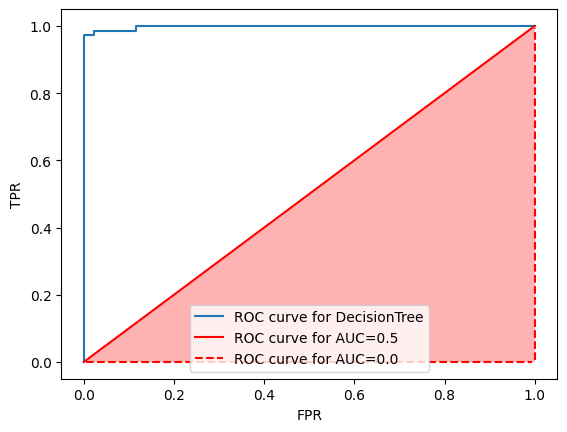

In [20]:
from sklearn.metrics import roc_curve
pnt_1 = [0, 1]
pnt_2 = [0, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot( fpr, tpr,  label = 'ROC curve for DecisionTree')
plt.plot( pnt_1, pnt_2,  label = 'ROC curve for AUC=0.5', color='r')
plt.fill_between( pnt_1, pnt_2, alpha=0.3, facecolor='r')
plt.axvline(x=1,ymin=0.05, ymax=0.95, color='r', linestyle='--', label="ROC curve for AUC=0.0")
plt.axhline(y=0, xmin=0.05, xmax=0.95, color='r', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'best')
plt.show()

We can use the roc_auc_score function from the sklearn library to calculate the ROC AUC score for the plot above

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probabilities)

0.9980347199475925

### Advantages:

- AUC is invariant to scale. It is a measure of how good the predictions are ranked, rather than their absolute values.

- AUC is invariant to classification-threshold. It is a measure of the model’s performance (correctness of predictions) irrespective of the classification threshold chosen.

### Disadvantages:

- Invariance to scale is not always wanted. Sometimes we need the well adapted oribability outputs.

- Invariance to threshold is not always wanted as well. When there are big differences in terms of false negatives and false positives, we may want to aim to minimize only one of these. For example, in out cancer example previously, we mentioned how important it is to minimize the false negatives. In this case, AUC will not be a usefull metric.

## PR Curve vs ROC Curve

- ROC curves are suitable when we are dealing with more of a balanced dataset, whereas PR curves are suitable for imbalanced datasets.

- The PR cuve does not consider the true negatives, therefore it is a useful metric when we have an imbalanced dataset, if the negative class is the majority class, considering making correct negative predictions are not that critical for the problem.

- Since ROC curve also takes the true negatives into consideration, it is a better metric to use if the when also the negative class is important (when both TP and TN are important).

## References

- [How To Analyze the Performance of Machine Learning Models](https://viso.ai/deep-learning/analyzing-machine-learning-model-performance-strategies/)

- [Evaluation Methods for Classification Problems](https://medium.com/mlearning-ai/evaluation-methods-for-classification-problems-a388bb56d635)